In [28]:
!pip install gensim
!pip install nltk

In [9]:
import gensim
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

In [30]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Downloading Text Corpus

In [36]:
!pip install opendatasets --upgrade
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews'
od.download(dataset_url)

Skipping, found downloaded files in "./amazon-fine-food-reviews" (use force=True to force download)


In [ ]:
data=pd.read_csv("Reviews.csv")

In [33]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [34]:
corpus_text = '\n'.join(data[:50000]['Text'])
lemmatizer = WordNetLemmatizer()

In [37]:
t_data=[]
for i in sent_tokenize(corpus_text):
  temp=[]
  tokens=word_tokenize(i)
  lemmatized_tokens=[lemmatizer.lemmatize(token) for token in tokens]
  for j in lemmatized_tokens:
    if(j.isalnum()):
      temp.append(j.lower())
  t_data.append(temp)

In [38]:
t_data

[['i',
  'have',
  'bought',
  'several',
  'of',
  'the',
  'vitality',
  'canned',
  'dog',
  'food',
  'product',
  'and',
  'have',
  'found',
  'them',
  'all',
  'to',
  'be',
  'of',
  'good',
  'quality'],
 ['the',
  'product',
  'look',
  'more',
  'like',
  'a',
  'stew',
  'than',
  'a',
  'processed',
  'meat',
  'and',
  'it',
  'smell',
  'better'],
 ['my',
  'labrador',
  'is',
  'finicky',
  'and',
  'she',
  'appreciates',
  'this',
  'product',
  'better',
  'than',
  'most'],
 ['product',
  'arrived',
  'labeled',
  'a',
  'jumbo',
  'salted',
  'peanuts',
  'the',
  'peanut',
  'were',
  'actually',
  'small',
  'sized',
  'unsalted'],
 ['not',
  'sure',
  'if',
  'this',
  'wa',
  'an',
  'error',
  'or',
  'if',
  'the',
  'vendor',
  'intended',
  'to',
  'represent',
  'the',
  'product',
  'a',
  'jumbo'],
 ['this',
  'is',
  'a',
  'confection',
  'that',
  'ha',
  'been',
  'around',
  'a',
  'few',
  'century'],
 ['it',
  'is',
  'a',
  'light',
  'pillowy',

# WORD2VEC WORD EMBEDDINGS

In [39]:
model1=Word2Vec(t_data,min_count=1,vector_size=100,window=5,sg=0)
model2=Word2Vec(t_data,min_count=1,vector_size=100,window=5,sg=1)

In [40]:
#print('similarity between two words is ',model1.wv.similarity('highly','recommend'))
print('similarity between two words is ',model2.wv.similarity('highly','recommend'))

similarity between two words is  0.77576715


In [41]:
print('similarity between two words is ',model2.wv.similarity('tea','coffee'))

similarity between two words is  0.6400501


In [42]:
embedding = model2.wv['recommend']
print(f"Embedding for '{'recommend'}':\n{embedding}")

Embedding for 'recommend':
[-0.41012725  0.33869237 -0.5080207  -0.17469695  0.6328387  -1.0314417
 -0.27159083  0.12155338 -0.59288603 -0.39580616  0.0960302  -0.4875321
  0.7118886  -0.03852042 -0.05909441 -0.30176657  0.67341983 -0.4019283
 -0.44032663 -1.4359605   0.2554614   0.03020154  0.22151908 -0.263304
 -0.36152905 -0.10858025 -0.03071206 -0.43985462 -0.1958771  -0.52328426
  0.52491     0.13550341 -0.01175502 -0.32755888 -0.785504    0.7268203
 -0.17600393 -0.40390185 -0.7756213   0.6444981  -0.03955012 -1.0056684
 -0.1254981   0.35939384  0.0095896   0.63096607 -1.0160226  -0.18214352
  0.946967    0.36166185 -0.27851245  0.50123096 -0.31324187 -0.21374281
  0.16541177  0.07369463 -0.4006274  -0.35190085 -0.18771462  0.2119276
 -0.07123286 -0.24851067  0.01692431  0.20866403 -0.0233308   0.14644043
  0.06863366  0.713811   -0.27466762  0.1957885   0.00458886  0.18238312
  0.78654855 -0.42929548  0.06531107  0.24262783  0.16879173 -0.37192488
  0.11346351 -0.08352185 -0.0334

**Semantic Textual Similarity**

In [43]:

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np



sentence1 = "This Product is highly recommended."
sentence2 = "I like the product."


from nltk.tokenize import word_tokenize

def tokenize_and_preprocess_text(sentence):
    tokens = word_tokenize(sentence)
    tokens=[lemmatizer.lemmatize(token) for token in tokens]
    tokens = [token.lower() for token in tokens if token.isalnum()]

    return tokens


tokens1 = tokenize_and_preprocess_text(sentence1)
tokens2 = tokenize_and_preprocess_text(sentence2)

def get_sentence_vector(tokens, model):
    # Filter out tokens that are not in the model's vocabulary
    if not tokens:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[tokens], axis=0)

vector1 = get_sentence_vector(tokens1, model2)
vector2 = get_sentence_vector(tokens2, model2)

# Calculate the cosine similarity between the two sentence vectors
similarity = cosine_similarity([vector1], [vector2])[0][0]

print(f"Cosine Similarity: {similarity}")


Cosine Similarity: 0.7871932983398438


T_SNE

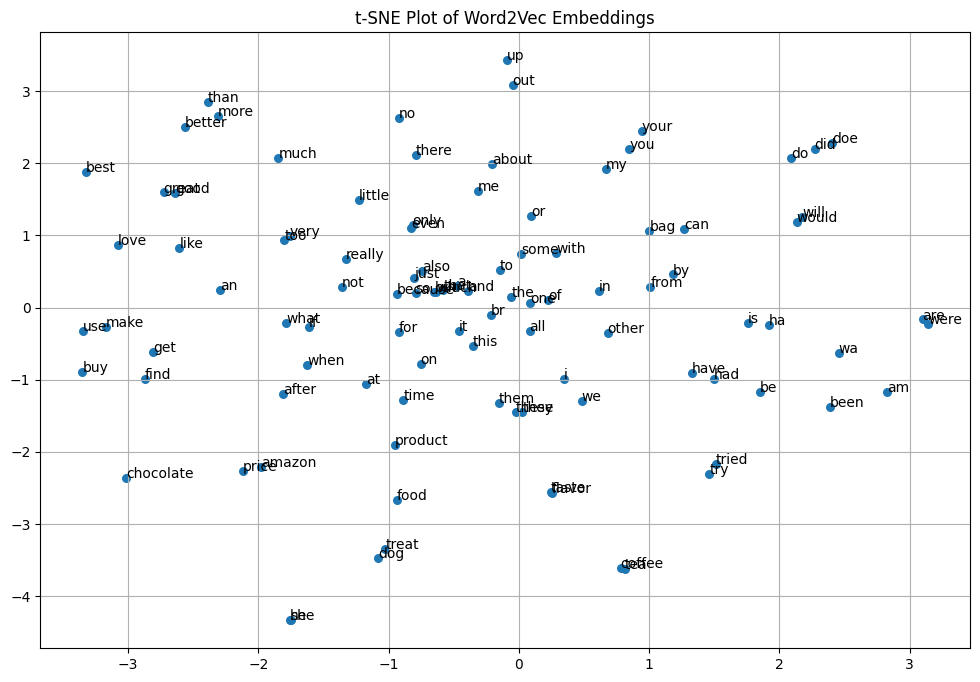

In [44]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models import Word2Vec


# Get word vectors and corresponding words from the model
words = list(model2.wv.index_to_key)
words=words[:100]
word_vectors = [model2.wv[word] for word in words]

# Convert word_vectors to a NumPy array
word_vectors = np.array(word_vectors)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o', s=30)

# Label some points for reference (optional)
sample_words = words[:100]  # Label the first 5 words from your list
for word, (x, y) in zip(sample_words, word_vectors_2d[:100]):
    plt.annotate(word, (x, y))

# # Label some points for reference (optional)
# sample_words = ['word1', 'word2', 'word3']  # Replace with words from your model
# for word in sample_words:
#     idx = words.index(word)
#     plt.annotate(word, (word_vectors_2d[idx, 0], word_vectors_2d[idx, 1]))

# Show the plot
plt.title('t-SNE Plot of Word2Vec Embeddings')
plt.grid(True)
plt.show()


# GLOVE WORD EMBEDDINGS

In [45]:
import os
import urllib.request
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np




!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip





--2023-10-11 04:40:54--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-10-11 04:40:54--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-10-11 04:40:54--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [47]:
# create the dict.
x=[token for token in list(i for i in t_data)]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

# number of unique words in dict.
print("Number of unique words in dictionary=",
	len(tokenizer.word_index))
print("Dictionary is = ", tokenizer.word_index)

Number of unique words in dictionary= 35605
Dictionary is =  {'the': 1, 'i': 2, 'a': 3, 'and': 4, 'it': 5, 'to': 6, 'of': 7, 'is': 8, 'this': 9, 'br': 10, 'for': 11, 'in': 12, 'that': 13, 'my': 14, 'but': 15, 'you': 16, 'with': 17, 'have': 18, 'not': 19, 'are': 20, 'wa': 21, 'they': 22, 'like': 23, 'on': 24, 'so': 25, 'these': 26, 'them': 27, 'taste': 28, 'good': 29, 'be': 30, 'one': 31, 'flavor': 32, 'at': 33, 'or': 34, 'product': 35, 'just': 36, 'if': 37, 'very': 38, 'do': 39, 'great': 40, 'can': 41, 'love': 42, 'coffee': 43, 'all': 44, 'tea': 45, 'we': 46, 'from': 47, 'would': 48, 'when': 49, 'more': 50, 'ha': 51, 'had': 52, 'will': 53, 'me': 54, 'food': 55, 'get': 56, 'out': 57, 'than': 58, 'dog': 59, 'make': 60, 'other': 61, 'no': 62, 'some': 63, 'really': 64, 'about': 65, 'only': 66, 'up': 67, 'time': 68, 'too': 69, 'much': 70, 'an': 71, 'there': 72, 'your': 73, 'because': 74, 'bag': 75, 'also': 76, 'were': 77, 'little': 78, 'use': 79, 'amazon': 80, 'price': 81, 'what': 82, 'he':

In [48]:
def embedding_for_vocab(filepath, word_index,
						embedding_dim):
	vocab_size = len(word_index) + 1

	# Adding again 1 because of reserved 0 index
	embedding_matrix_vocab = np.zeros((vocab_size,
									embedding_dim))

	with open(filepath, encoding="utf8") as f:
		for line in f:
			word, *vector = line.split()
			if word in word_index:
				idx = word_index[word]
				embedding_matrix_vocab[idx] = np.array(
					vector, dtype=np.float32)[:embedding_dim]

	return embedding_matrix_vocab


# matrix for vocab: word_index
embedding_dim = 50
embedding_matrix_vocab = embedding_for_vocab(
	'/content/glove.6B.50d.txt', tokenizer.word_index,
embedding_dim)

print("Dense vector for first word 'the' is => ",
	embedding_matrix_vocab[1])

Dense vector for first word 'the' is =>  [ 4.18000013e-01  2.49679998e-01 -4.12420005e-01  1.21699996e-01
  3.45270008e-01 -4.44569997e-02 -4.96879995e-01 -1.78619996e-01
 -6.60229998e-04 -6.56599998e-01  2.78430015e-01 -1.47670001e-01
 -5.56770027e-01  1.46579996e-01 -9.50950012e-03  1.16579998e-02
  1.02040000e-01 -1.27920002e-01 -8.44299972e-01 -1.21809997e-01
 -1.68009996e-02 -3.32789987e-01 -1.55200005e-01 -2.31309995e-01
 -1.91809997e-01 -1.88230002e+00 -7.67459989e-01  9.90509987e-02
 -4.21249986e-01 -1.95260003e-01  4.00710011e+00 -1.85939997e-01
 -5.22870004e-01 -3.16810012e-01  5.92130003e-04  7.44489999e-03
  1.77780002e-01 -1.58969998e-01  1.20409997e-02 -5.42230010e-02
 -2.98709989e-01 -1.57490000e-01 -3.47579986e-01 -4.56370004e-02
 -4.42510009e-01  1.87849998e-01  2.78489990e-03 -1.84110001e-01
 -1.15139998e-01 -7.85809994e-01]


In [49]:
from sklearn.metrics.pairwise import cosine_similarity

word_to_find = 'good'
if word_to_find in tokenizer.word_index:
    idx = tokenizer.word_index[word_to_find]
    # Access the word embedding vector for 'good'
    embedding_of_good = embedding_matrix_vocab[idx]
    print(f"Word embedding vector for '{word_to_find}':\n{embedding_of_good}")
else:
    print(f"'{word_to_find}' not found in the vocabulary.")

# Calculate similarity between two words (e.g., 'good' and 'excellent')
word1 = 'good'
word2 = 'excellent'
if word1 in tokenizer.word_index and word2 in tokenizer.word_index:
    idx1 = tokenizer.word_index[word1]
    idx2 = tokenizer.word_index[word2]
    embedding1 = embedding_matrix_vocab[idx1]
    embedding2 = embedding_matrix_vocab[idx2]
    similarity = cosine_similarity([embedding1], [embedding2])[0][0]
    print(f"Similarity between '{word1}' and '{word2}': {similarity}")
else:
    print("One or both of the words not found in the vocabulary.")


Word embedding vector for 'good':
[-3.55859995e-01  5.21300018e-01 -6.10700011e-01 -3.01310003e-01
  9.48620021e-01 -3.15389991e-01 -5.98309994e-01  1.21880002e-01
 -3.19430009e-02  5.56949973e-01 -1.06210001e-01  6.33989990e-01
 -4.73399997e-01 -7.58949965e-02  3.82470012e-01  8.15690011e-02
  8.22139978e-01  2.22200006e-01 -8.37639999e-03 -7.66200006e-01
 -5.62529981e-01  6.17590010e-01  2.02920005e-01 -4.85979989e-02
  8.78149986e-01 -1.65489995e+00 -7.74179995e-01  1.54349998e-01
  9.48230028e-01 -3.95200014e-01  3.73020005e+00  8.28549981e-01
 -1.41039997e-01  1.63950007e-02  2.11150005e-01 -3.60849984e-02
 -1.55870005e-01  8.65830004e-01  2.63090014e-01 -7.10150003e-01
 -3.67700011e-02  1.82819995e-03 -1.77039996e-01  2.70319998e-01
  1.10260002e-01  1.41330004e-01 -5.73219992e-02  2.72069991e-01
  3.13050002e-01  9.27709997e-01]
Similarity between 'good' and 'excellent': 0.8061552559026371


STS

In [50]:

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np



sentence1 = "This Product is highly recommended."
sentence2 = "I like the product."


from nltk.tokenize import word_tokenize

def tokenize_and_preprocess_text(sentence):
    tokens = word_tokenize(sentence)
    tokens=[lemmatizer.lemmatize(token) for token in tokens]
    tokens = [token.lower() for token in tokens if token.isalnum()]

    return tokens


tokens1 = tokenize_and_preprocess_text(sentence1)
tokens2 = tokenize_and_preprocess_text(sentence2)

def get_sentence_vector(tokens, model):
    # Filter out tokens that are not in the model's vocabulary
    if not tokens:
        return np.zeros(model.vector_size)
    return np.mean(list(embedding_matrix_vocab[tokenizer.word_index[word]] for word in tokens), axis=0)

vector1 = get_sentence_vector(tokens1, model2)
vector2 = get_sentence_vector(tokens2, model2)

# Calculate the cosine similarity between the two sentence vectors
similarity = cosine_similarity([vector1], [vector2])[0][0]

print(f"Cosine Similarity: {similarity}")


Cosine Similarity: 0.8792564659981774


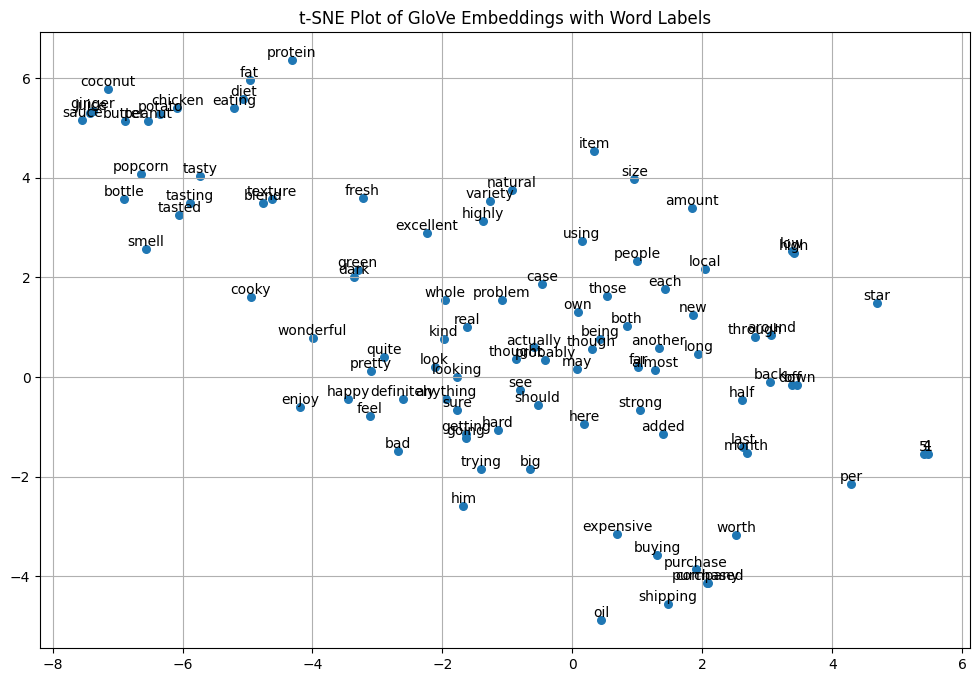

In [51]:


# Load pre-trained GloVe embeddings
embedding_path = '/content/glove.6B.50d.txt'
word_embeddings = {}
with open(embedding_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        word_embeddings[word] = vector

# Get word vectors and corresponding words from the GloVe model
words = list(tokenizer.word_index.keys())
words = words[200:300]  # Limit to the 100 words for the example
word_vectors = [embedding_matrix_vocab[tokenizer.word_index[word]] for word in words]

# Convert word_vectors to a NumPy array
word_vectors = np.array(word_vectors)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o', s=30)

# Label points with word labels
for word, (x, y) in zip(words, word_vectors_2d):
    plt.text(x, y, word, fontsize=10, ha='center', va='bottom')

# Show the plot
plt.title('t-SNE Plot of GloVe Embeddings with Word Labels')
plt.grid(True)
plt.show()
